In [33]:
import collections

import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import utils

input_files = ["a_example.txt", "b_lovely_landscapes",
               "c_memorable_moments", "d_pet_pictures", "e_shiny_selfies"]
file = input_files[1]
alignments, tags = utils.read_input(file)

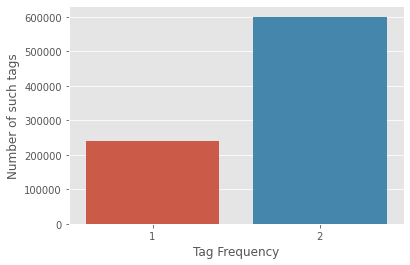

In [19]:
freq = collections.defaultdict(lambda: 0)

for image_tags in tags:
    for tag in image_tags:
        freq[tag] += 1

sns.countplot(list(freq.values()))
plt.xlabel('Tag Frequency')
plt.ylabel('Number of such tags')
plt.show()

Number of Images: 80000
Number of Unique tags: 1440000


<AxesSubplot:ylabel='count'>

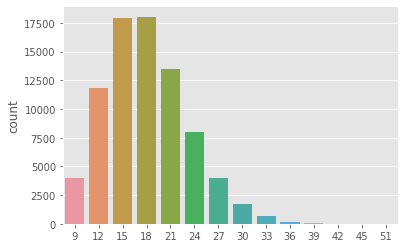

In [22]:
print("Number of Images:", len(tags))
print("Number of Unique tags:", sum(freq.values()))

sns.countplot(list(map(len, tags)))
plt.xlabel('Number of tags in the image')
plt.ylabel('Number of such images')

In [39]:
find_tag = collections.defaultdict(lambda: [])
for idx, image_tags in enumerate(tags):
    for tag in image_tags:
        find_tag[tag].append(idx)
pairs = collections.defaultdict(int)
for key, value in find_tag.items():
    if len(value) == 2:
        if value[0] > value[1]:
            value[1], value[0] = value[0], value[1]
        pairs[(value[0], value[1])] += 1

[200000] and another 6399400000 0s


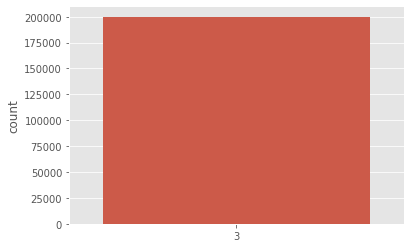

In [44]:
edge_weights = list(pairs.values())
sns.countplot(edge_weights)
print(np.unique(edge_weights, return_counts=True)[1], "and another",
      (len(tags) * len(tags) - sum(edge_weights)), "0s")

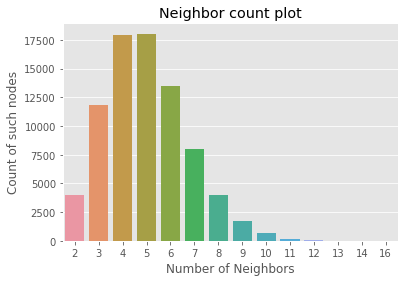

In [47]:
neighbor_counts = collections.defaultdict(int)
for u, v in pairs.keys():
    neighbor_counts[u] += 1
    neighbor_counts[v] += 1
sns.countplot(list(neighbor_counts.values()))
plt.xlabel('Number of Neighbors')
plt.ylabel('Count of such nodes')
plt.title('Neighbor count plot')
plt.show()
